In [1]:
'''
    @Author: Dhananjay Kumar
    @Date: 25-11-2024
    @Last Modified by: Dhananjay Kumar
    @Last Modified time: 25-11-2024
    @Title: Multiple Linear Regression Implementaion
'''

'\n    @Author: Dhananjay Kumar\n    @Date: 25-11-2024\n    @Last Modified by: Dhananjay Kumar\n    @Last Modified time: 25-11-2024\n    @Title: Multiple Linear Regression Implementaion\n'

# Y = w1x1 + w2x2 + w3x3 + b
# wi : weight
# b : bias

cost = Σ(ypred - y)^2/2*n

for i in no. of parameters:

    wi' = wi - α(∂cost/∂wi)

    dm = (∂cost/∂f)*(∂f/∂m) = (ypred - y)*x/n

    dw1 = (ypred - y)*xi/n

    dw2 = (ypred - y)*x2/n

    dw3 = (ypred - y)*x3/n

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("multiple_linear_regression.csv")

In [4]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.shape

(200, 4)

# Data Preprocessing

In [7]:
data.dropna(inplace= True)

In [8]:
data.shape

(200, 4)

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
data[data.duplicated()]

,Feature 1,Feature 2,Feature 3,Target


## Spliting the data

In [11]:
y = data["Target"]
x = data.iloc[:,data.columns != "Target"]

In [12]:
y.shape

(200,)

In [13]:
x.shape

(200, 3)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train.shape

(160, 3)

In [16]:
y_train.shape

(160,)

# <font color = 'orange'>Multiple Linear Regression</font>

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
lr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [20]:
lr.intercept_

np.float64(2.9790673381226256)

# <font color ='red'>Prediction</font>

In [21]:
y_pred = lr.predict(x_test)

# <font color = "Blue">Cost</font>

In [22]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test,y_pred)

In [23]:
cost

np.float64(3.174097353976104)

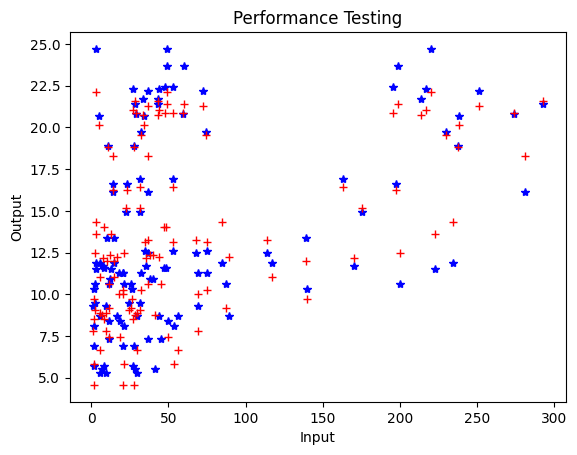

In [24]:
plt.plot(x_test,y_test,"*",color="Blue")
plt.plot(x_test,y_pred,"+",color='red')
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# <font color = "purple">ASSUMPTION OF LINEAR REGRESSION</font>

 ## Homocesdasticity

In [25]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [26]:
y_test = np.array(y_test)

In [27]:
y_test

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

In [28]:
residual = y_pred - y_test
residual

array([-0.4919758 , -1.51011791,  0.15384318,  3.30850256, -2.58762674,
        0.50559172, -1.24280808, -0.93898966,  2.10634581,  0.25506967,
       -0.45168008, -2.04671688,  2.44554487,  3.60349333, -0.61040972,
        0.46494386,  3.23628397, -0.33492742, -1.02240418, -0.06890897,
       -0.13963347,  0.75103464,  1.43620695, -0.89304868, -1.47259695,
       -2.29042552, -0.94246769, -1.41861923, -1.41650424,  2.8066991 ,
        1.86646769, -1.29662305, -2.3123291 ,  3.54966368,  2.16661538,
       -0.56233733,  2.45514005,  0.05411186, -0.8825559 , -2.33100378])

Text(0, 0.5, 'residual')

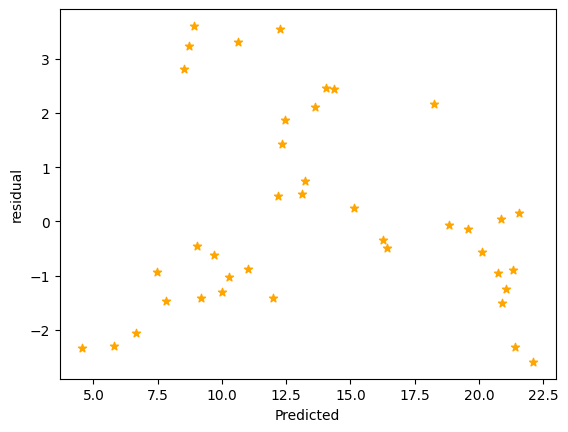

In [29]:
plt.scatter(y_pred,residual,color='orange',marker='*')
plt.xlabel("Predicted")
plt.ylabel("residual")

C:\Users\dhana\AppData\Local\Temp\ipykernel_2204\936630578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: ylabel='Density'>

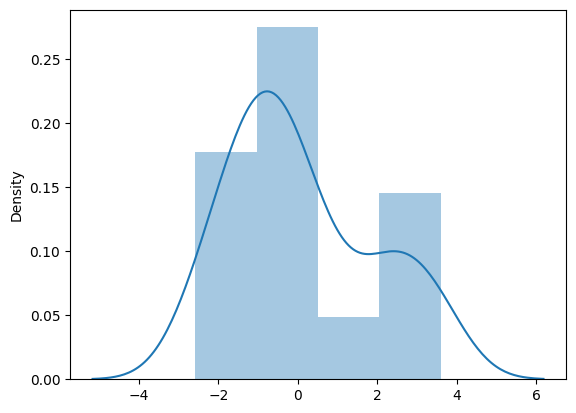

In [30]:
sns.distplot(residual,kde=True)

# <font color='red'>OLS</font>

 R^2   =   1 - (RSS/TSS)

 R^2 : Coefficient of determination
 
 RSS : sum of square of residuals

 TSS : total sum of squares

 ymean = 1/n(Σyi)       1<=i<=n

 RSS = Σ(yi - ypred) = Σei^2

 TSS = Σ(yi - ymean) = proportional to variance

0 <= R^2 <= 1

R^2 = 1   (best fit)

R^2 = 0   (worst/baseline fit)

R^2  tells the how the point the tight packed around the regression line

R^2 = 1 all the point lies on the regression line

R^2 = 0.8 all the point lies near the regression line(predict the values better)

R^2 = 0.2 the point are far from the regression line(cannot predict the values)

# F-TEST

- Null Hypothesis (H0)  
- Alternate Hypothesis(H1)
- ypred = w0x0
- ypred = w0x0 + w1x1 + w2x2 + w3x3

Null hyothesis says train with with both case the model work equals(ypred and ypred)
Alternate Hypothesis says (ypred and ypred are not equals)

p-value < 0.05 reach Null hypothesis

# <font color = 'green'>ORDINARY LEAST SQUARES (OLS) method</font>

In [31]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
import statsmodels.api as sm

In [33]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
79,1.0,116.0,7.7,23.1
197,1.0,177.0,9.3,6.4
38,1.0,43.1,26.7,35.1
24,1.0,62.3,12.6,18.3
122,1.0,224.0,2.4,15.6
...,...,...,...,...
106,1.0,25.0,11.0,29.7
14,1.0,204.1,32.9,46.0
92,1.0,217.7,33.5,59.0
179,1.0,165.6,10.0,17.6


In [34]:
model = sm.OLS(y_train,x_with_constant)

In [35]:
result = model.fit()

In [36]:
result.params

const        2.979067
Feature 1    0.044730
Feature 2    0.189195
Feature 3    0.002761
dtype: float64

In [37]:
lr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [38]:
lr.intercept_

np.float64(2.9790673381226256)

In [39]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.53e-76
Time:                        16:44:44   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.0